In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [4]:
df = pd.read_csv("Keyword_data - Keyword_data.csv")

In [5]:
df0203 = df.iloc[2:,1:]
df0203

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
...,...,...,...,...,...,...,...,...,...,...,...,...
61,INTERNATIONAL business enterprises -- Management,FOREIGN subsidiaries -- Management,EMPLOYEE selection,EXECUTIVES -- Recruiting,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,AGENCY theory,RESOURCE-based theory of the firm,PERSONNEL management,EMPLOYMENT in foreign countries,SUBSIDIARY corporations -- Management,HOST countries (Business)
62,PERSONNEL management,COMPETITIVE advantage,BUSINESS networks,INDUSTRIAL management,STRATEGIC planning,SOCIAL networks,RESOURCE management,RESOURCE-based theory of the firm,HUMAN capital -- Management,INTELLECTUAL capital,DECISION making,INDUSTRIAL efficiency
63,COMPENSATION management,ORGANIZATIONAL behavior,PERSONNEL management,HOSPITALS -- Administration,MANAGEMENT,FINANCIAL performance,WAGE payment systems,RESOURCE management,ORGANIZATIONAL effectiveness,INDUSTRIAL efficiency,FINANCIAL management,INDUSTRIAL management
64,CROSS-functional teams,TEAMS in the workplace,GROUP identity,ORGANIZATIONAL behavior,MANAGEMENT,PERFORMANCE,PERSONNEL management,COMPETITIVE advantage,ORGANIZATIONAL effectiveness,GROUP decision making,ORGANIZATIONAL structure,ORGANIZATIONAL sociology


In [6]:
df0203.dropna(how='all',inplace=True)
## Finish cleaning the dataset

In [7]:
lst = df0203['Keyword 1']
for i in range(1,len(df0203.columns)):
    lst=pd.concat([lst,df0203.iloc[:,i]])
lst = lst.dropna()
lst_name = list(lst.unique())
## Getting all of the unique Keywords and will use this to create a adjacency matrix (n*n where n = len(unique keywords))

In [8]:
def fill_adj(dataframe):
    adj = np.zeros((len(lst_name),len(lst_name)))
    for i in range(len(dataframe)):
        for j in range(len(dataframe.columns)):
            for k in range(j + 1, len(dataframe.columns)):
                if pd.notnull(dataframe.iloc[i,j])and pd.notnull(dataframe.iloc[i,k]):
                    adj[lst_name.index(dataframe.iloc[i,j])][lst_name.index(dataframe.iloc[i,k])] = adj[lst_name.index(dataframe.iloc[i,j])][lst_name.index(dataframe.iloc[i,k])] + 1
                    adj[lst_name.index(dataframe.iloc[i,k])][lst_name.index(dataframe.iloc[i,j])] = adj[lst_name.index(dataframe.iloc[i,k])][lst_name.index(dataframe.iloc[i,j])] + 1
    return adj
## Create such a function to filling the adjacency matrix

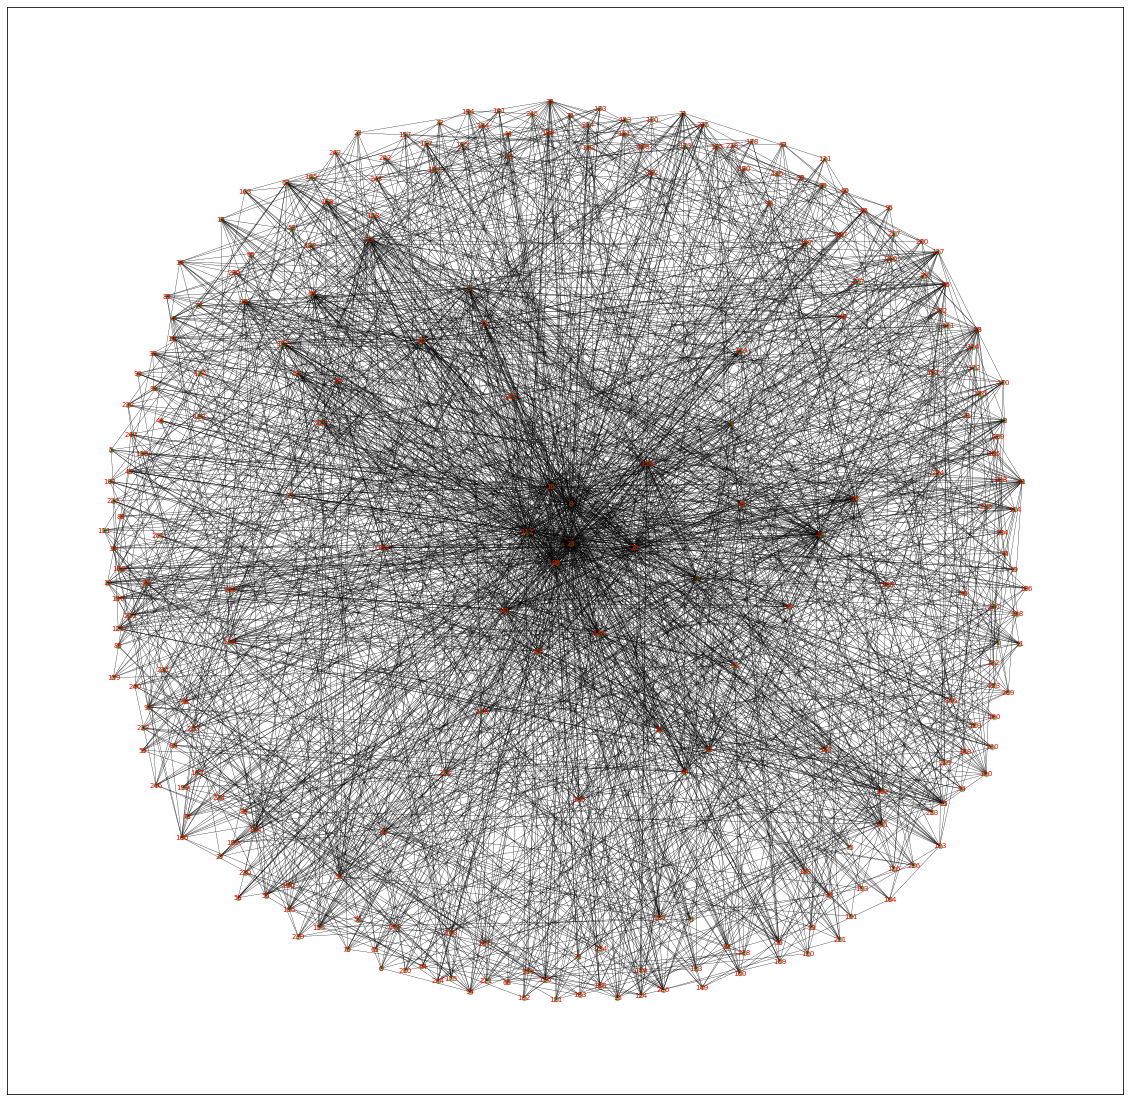

In [9]:
map = nx.from_numpy_matrix(fill_adj(df0203))
fig,ax=plt.subplots(figsize=(20,20))
cor=nx.spring_layout(map,k=2)
nx.draw_networkx_labels(map, cor, font_size=7,font_color='red')
nx.draw_networkx_nodes(map, cor, node_size=20, node_color='green', alpha=0.4)
nx.draw_networkx_edges(map, cor, width=0.3)
plt.show()

In [10]:
rst1 = pd.DataFrame(list(map.degree()))
rst2 = pd.DataFrame(list(map.degree(weight='weight')))
rst1[0]=lst_name
rst1.set_index(0)
rst2[0]=lst_name
rst2.rename(columns={1:2},inplace=True)
rst2.set_index(0)
rst = rst1.merge(rst2,how='left')
rst.rename(columns={0:'Node Name',1:'Degree',2:'Strength'},inplace=True)
rst
## Getting all of the nodes and their degree and strength and make a dataframe for them

,Node Name,Degree,Strength
0,EQUITY,10,10.0
1,DIVERSIFICATION in industry,18,20.0
2,INTERORGANIZATIONAL relations,24,27.0
3,EXECUTIVE compensation,31,36.0
4,KNOWLEDGE management,19,20.0
...,...,...,...
243,TRANSACTION costs,11,11.0
244,INNOVATION adoption,11,11.0
245,WORK attitudes,11,11.0
246,HOST countries (Business),11,11.0


In [11]:
rst.sort_values(by='Degree',ascending=False).head(10)
## Getting top 10 nodes with highest degree

,Node Name,Degree,Strength
23,ORGANIZATIONAL behavior,166,265.0
112,ORGANIZATIONAL effectiveness,104,144.0
16,MANAGEMENT science,102,136.0
20,PERSONNEL management,93,126.0
8,DECISION making,90,112.0
156,ORGANIZATIONAL structure,74,107.0
40,ORGANIZATIONAL sociology,66,96.0
88,STRATEGIC planning,66,80.0
47,INDUSTRIAL management,64,84.0
9,CORPORATE governance,62,85.0


In [12]:
rst.sort_values(by='Strength',ascending=False).head(10)
## Getting top 10 nodes with highest strength

,Node Name,Degree,Strength
23,ORGANIZATIONAL behavior,166,265.0
112,ORGANIZATIONAL effectiveness,104,144.0
16,MANAGEMENT science,102,136.0
20,PERSONNEL management,93,126.0
8,DECISION making,90,112.0
156,ORGANIZATIONAL structure,74,107.0
40,ORGANIZATIONAL sociology,66,96.0
9,CORPORATE governance,62,85.0
47,INDUSTRIAL management,64,84.0
88,STRATEGIC planning,66,80.0


In [13]:
rst.sort_values(by=['Degree','Strength'],ascending=False).head(10)
## Getting top 10 nodes with pairs of degree and strength

,Node Name,Degree,Strength
23,ORGANIZATIONAL behavior,166,265.0
112,ORGANIZATIONAL effectiveness,104,144.0
16,MANAGEMENT science,102,136.0
20,PERSONNEL management,93,126.0
8,DECISION making,90,112.0
156,ORGANIZATIONAL structure,74,107.0
40,ORGANIZATIONAL sociology,66,96.0
88,STRATEGIC planning,66,80.0
47,INDUSTRIAL management,64,84.0
9,CORPORATE governance,62,85.0


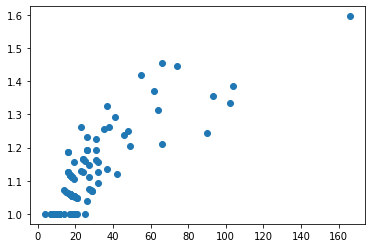

In [14]:
rst['Average Strength']=rst['Strength']/rst['Degree']
plt.scatter(rst['Degree'],rst['Average Strength'])
plt.show()
## Create a scatter with degree (x_axis) and average strength (y_axis)